## TP 01 - Algorithme d'apprentissage et évaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

pathToData = 'C:/Users/aroma/Documents/GTI770/data/'

df = pd.read_csv(pathToData + 'galaxy_features')
df = df.drop('Unnamed: 0', axis = 1)

### Partie 1 - Mise en place de l'arbre de décision
Nous allons tout d'abord entrainer un modèle pour ce problème avec nos features que nous avons extraites. Nous appliquerons une méthode de validation croisée pour l'évaluer.

In [2]:
y = df.galaxy_type

galaxy_features = ['threshold value 1','threshold value 2','threshold value 3',
                   'central pixel red','central pixel green','central pixel blue','contour detection']
X = df[galaxy_features]

In [29]:
max_depth = [2,5,8,10,11,12,13,14,20,25,30]

In [30]:
for k in range (len(max_depth)) :
    clf = tree.DecisionTreeClassifier(max_depth = max_depth[k])
    scores = cross_val_score(clf, X, y, cv=10)
    print("Max_depth = " + str(max_depth[k]) + "\nAccuracy: %0.4f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print("Max_depth = None\nAccuracy: %0.4f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Max_depth = 2
Accuracy: 0.7351 (+/- 0.025)
Max_depth = 5
Accuracy: 0.8020 (+/- 0.017)
Max_depth = 8
Accuracy: 0.8441 (+/- 0.013)
Max_depth = 10
Accuracy: 0.8448 (+/- 0.020)
Max_depth = 11
Accuracy: 0.8428 (+/- 0.014)
Max_depth = 12
Accuracy: 0.8434 (+/- 0.013)
Max_depth = 13
Accuracy: 0.8373 (+/- 0.017)
Max_depth = 14
Accuracy: 0.8393 (+/- 0.013)
Max_depth = 20
Accuracy: 0.8267 (+/- 0.013)
Max_depth = 25
Accuracy: 0.8248 (+/- 0.008)
Max_depth = 30
Accuracy: 0.8235 (+/- 0.014)
Max_depth = None
Accuracy: 0.8223 (+/- 0.012)


### Partie 2 - Évaluation des couples de primitives

En travaillant avec nos caractéristiques et sur le max_depth nous avons réussi à atteindre le score de 0.8448. Nous allons maintenant comparer le pouvoir discriminant de nos features.

In [25]:
color = []
for k in range (y.shape[0]) :
    if y.iloc[k] == "smooth" :
        color.append(0)
    else :
        color.append(1)    

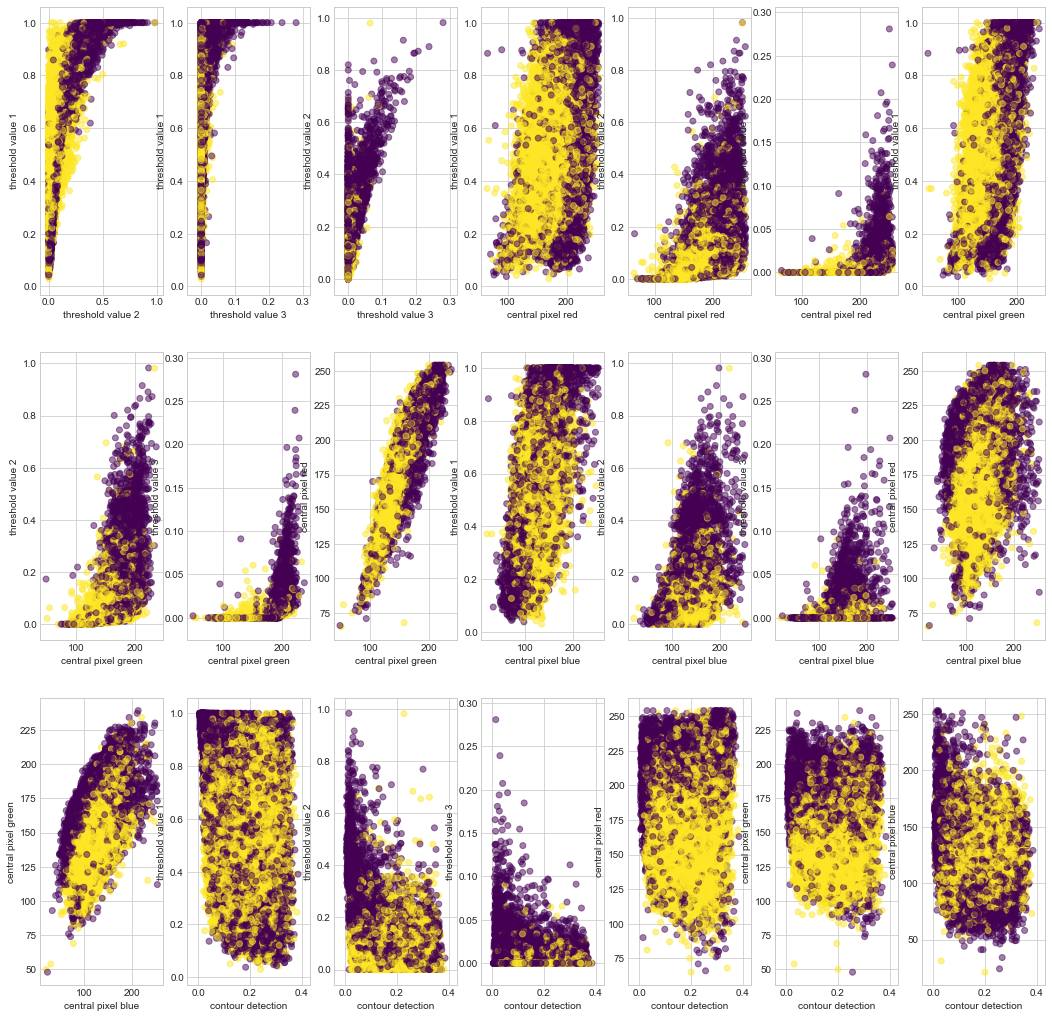

In [9]:
%matplotlib inline
plt.figure(figsize = (18, 18))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.style.use('seaborn-whitegrid')

compteur = 1

for k in range (len(galaxy_features)) :
    l = 0
    while l < k :
        plt.subplot(3,7,compteur)
        plt.scatter(X[galaxy_features[k]], X[galaxy_features[l]], c = color, cmap = 'viridis', alpha = 0.5)
        plt.xlabel(galaxy_features[k])
        plt.ylabel(galaxy_features[l])
        l+=1
        compteur+=1